In [ ]:
# Link to google docs containing Chat Logs 
# https://docs.google.com/document/d/1aQVioSz61I1i6DrZql7PR9FnQZyLW_m6PPp0dq2cmqw/edit

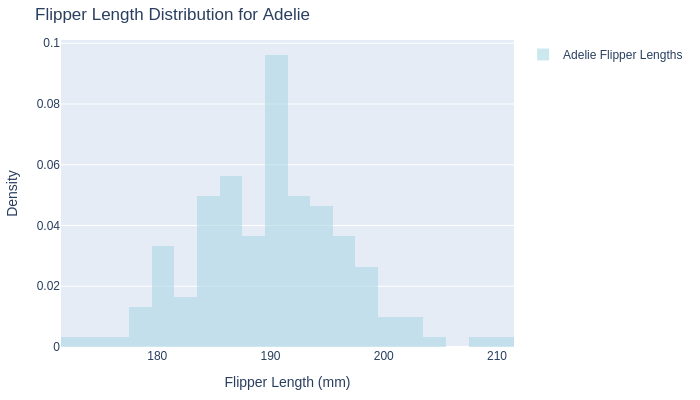

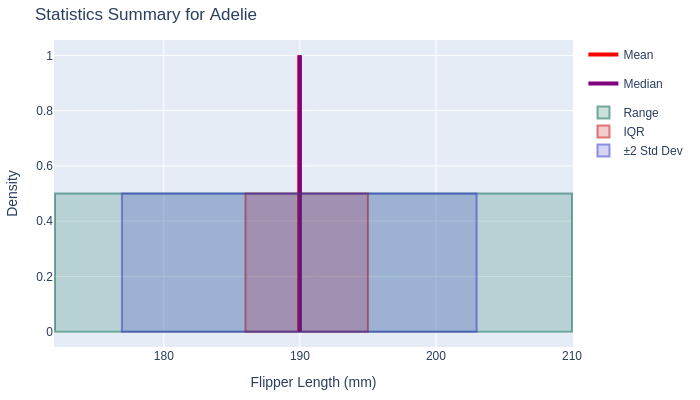

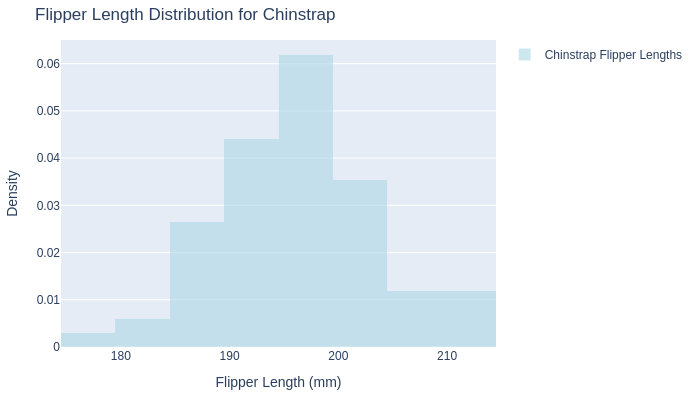

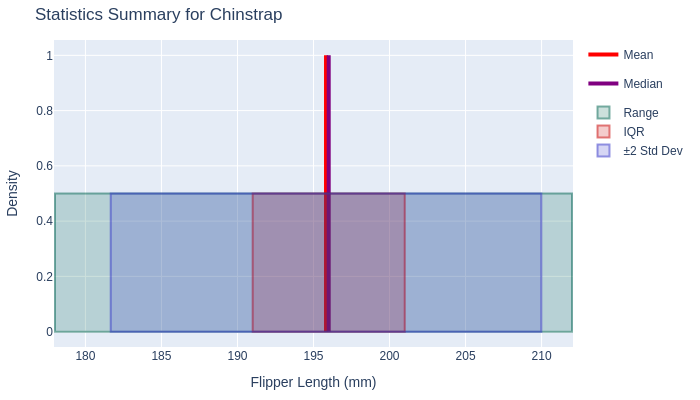

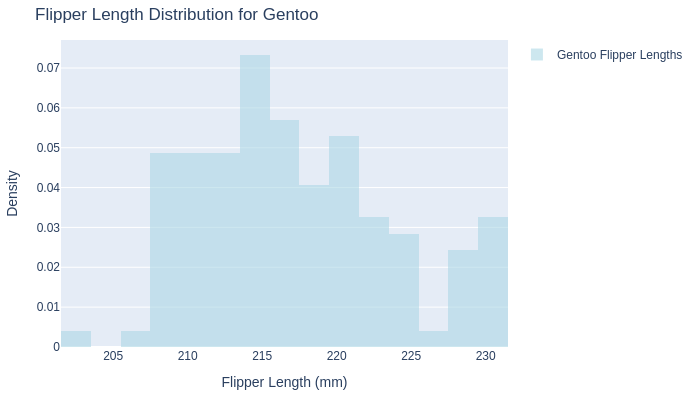

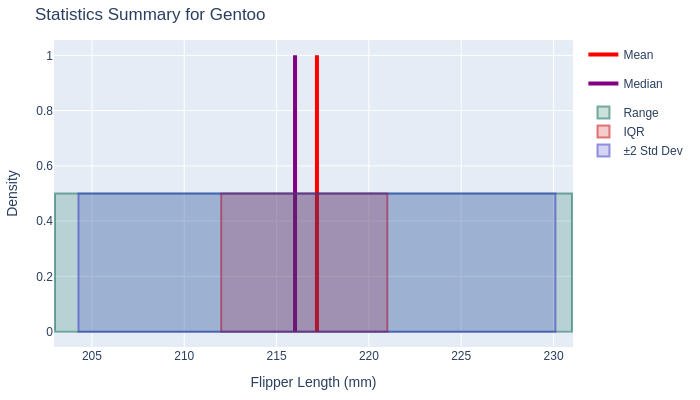

In [9]:
# Task 1

import pandas as pd
import numpy as np
import plotly.graph_objects as go

# Load the penguins dataset from a reliable source
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Drop any rows with missing flipper_length_mm values
penguins.dropna(subset=['flipper_length_mm'], inplace=True)

# Loop through each species to create individual histograms and summary plots
for species in penguins['species'].unique():
    data = penguins[penguins['species'] == species]['flipper_length_mm']
    
    # Calculate statistics
    mean = np.mean(data)
    median = np.median(data)
    min_val = np.min(data)
    max_val = np.max(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    std_dev = np.std(data)
    std_dev_range = (mean - 2 * std_dev, mean + 2 * std_dev)

    # Create a histogram for the current species
    hist_fig = go.Figure()

    # Add histogram
    hist_fig.add_trace(go.Histogram(
        x=data,
        name=f'{species} Flipper Lengths',
        marker_color='lightblue',
        opacity=0.6,
        histnorm='probability density'
    ))

    # Update histogram layout
    hist_fig.update_layout(
        title=f'Flipper Length Distribution for {species}',
        xaxis_title='Flipper Length (mm)',
        yaxis_title='Density',
        barmode='overlay',
        height=400,
        margin=dict(l=40, r=40, t=40, b=40),
        showlegend=True
    )

    # Create a statistics summary figure for the current species
    stats_fig = go.Figure()

    # Add mean line without annotation
    stats_fig.add_trace(go.Scatter(
        x=[mean, mean],
        y=[0, 1],
        mode='lines',
        name='Mean',
        line=dict(color='red', width=4)
    ))

    # Add median line without annotation
    stats_fig.add_trace(go.Scatter(
        x=[median, median],
        y=[0, 1],
        mode='lines',
        name='Median',
        line=dict(color='purple', width=4)
    ))

    # Add range rectangle
    stats_fig.add_shape(type='rect',
                        x0=min_val, x1=max_val,
                        y0=0, y1=0.5,  # Adjust y1 based on data density
                        fillcolor='rgba(0, 100, 80, 0.2)',
                        line=dict(color='rgba(0, 100, 80, 0.5)'),
                        name='Range',
                        legendgroup='Scale',
                        showlegend=True)

    # Add IQR rectangle
    stats_fig.add_shape(type='rect',
                        x0=q1, x1=q3,
                        y0=0, y1=0.5,  # Adjust y1 based on data density
                        fillcolor='rgba(200, 0, 0, 0.2)',
                        line=dict(color='rgba(200, 0, 0, 0.5)'),
                        name='IQR',
                        legendgroup='Scale',
                        showlegend=True)

    # Add two standard deviation range
    stats_fig.add_shape(type='rect',
                        x0=std_dev_range[0], x1=std_dev_range[1],
                        y0=0, y1=0.5,  # Adjust y1 based on data density
                        fillcolor='rgba(50, 50, 200, 0.2)',
                        line=dict(color='rgba(50, 50, 200, 0.5)'),
                        name='±2 Std Dev',
                        legendgroup='Scale',
                        showlegend=True)

    # Update statistics layout
    stats_fig.update_layout(
        title=f'Statistics Summary for {species}',
        xaxis_title='Flipper Length (mm)',
        yaxis_title='Density',
        showlegend=True,
        height=400,
        margin=dict(l=40, r=40, t=40, b=40)
    )

    # Show the figures for the current species
    hist_fig.show(renderer="png")
    stats_fig.show(renderer="png")


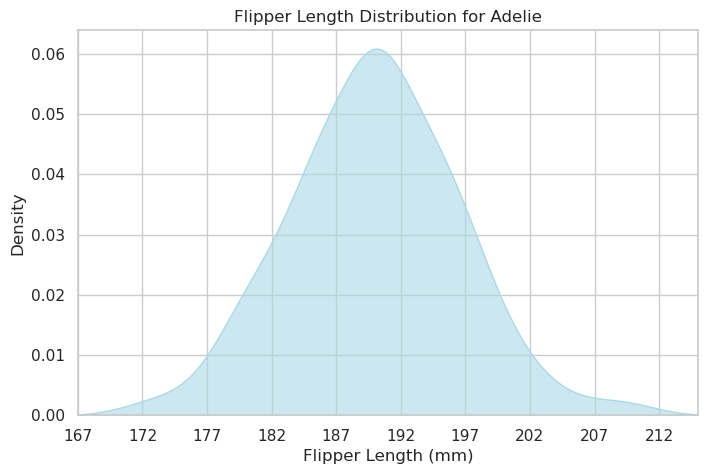

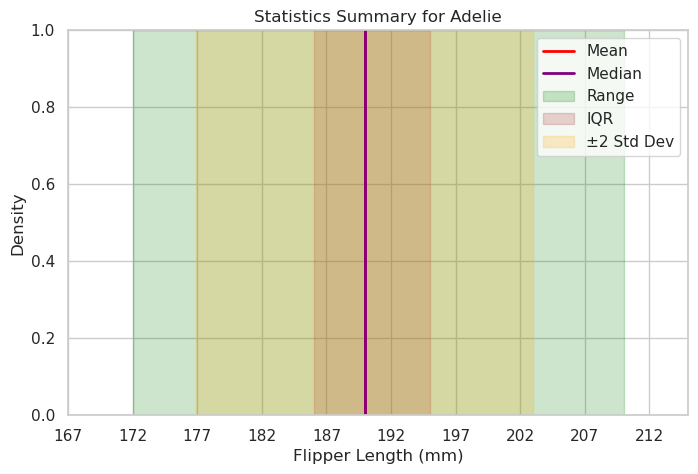

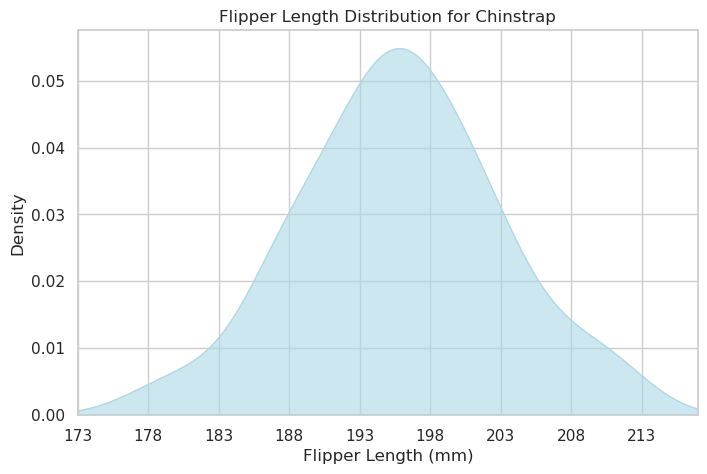

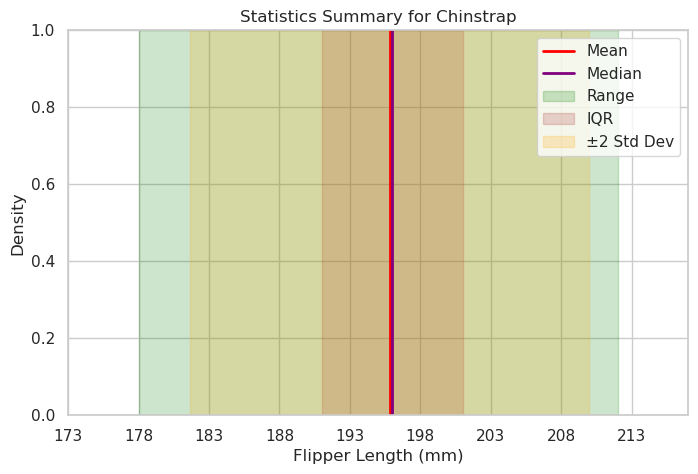

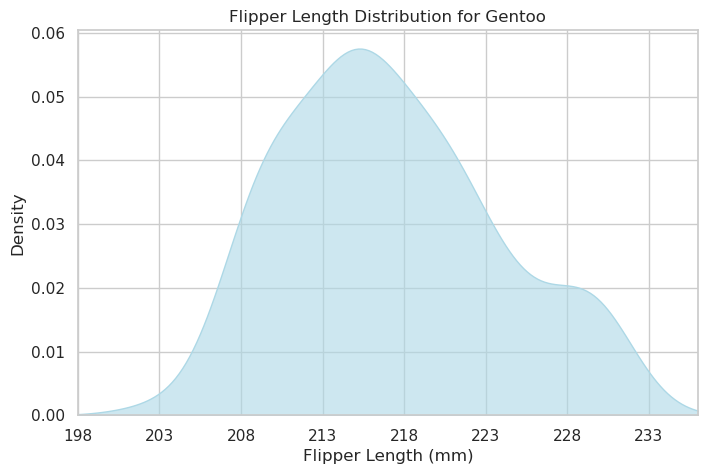

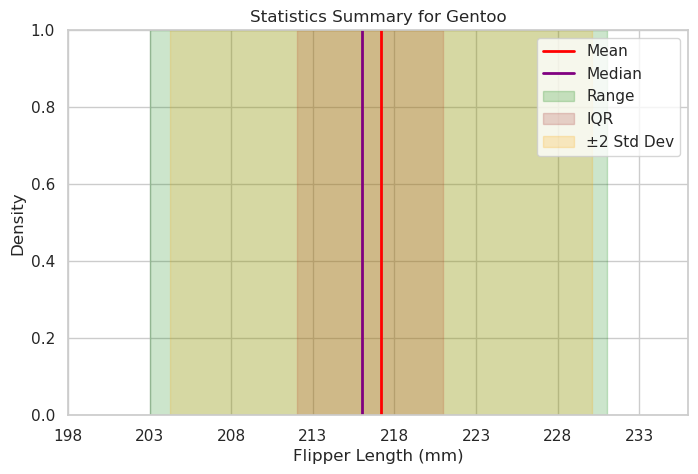

In [20]:
# Task 2

# I understand that we were asked to create 3 plots but I believe seperating KDE with stats summary made for a much easier comparison

# Loop through each species to create individual KDE plots and summary plots
for species in penguins['species'].unique():
    data = penguins[penguins['species'] == species]['flipper_length_mm']
    
    # Calculate statistics
    mean = np.mean(data)
    median = np.median(data)
    min_val = np.min(data)
    max_val = np.max(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    std_dev = np.std(data)
    std_dev_range = (mean - 2 * std_dev, mean + 2 * std_dev)

    # Create a figure for the KDE plot
    plt.figure(figsize=(fig_width, fig_height))

    # Add KDE plot with the original color
    sns.kdeplot(data, fill=True, color='lightblue', alpha=0.6)
    plt.title(f'Flipper Length Distribution for {species}')
    plt.xlabel('Flipper Length (mm)')
    plt.ylabel('Density')
    
    # Set dynamic x-axis limits based on min and max values
    plt.xlim(min_val - 5, max_val + 5)  # Adding a small margin for visual clarity
    plt.xticks(np.arange(min_val - 5, max_val + 6, 5))  # Dynamic ticks

    # Show the KDE plot
    plt.show()

    # Create a figure for the statistics summary (without KDE)
    plt.figure(figsize=(fig_width, fig_height))

    # Add mean line
    plt.axvline(mean, color='red', linewidth=2, label='Mean')
    
    # Add median line
    plt.axvline(median, color='purple', linewidth=2, label='Median')

    # Add range rectangle
    plt.axvspan(min_val, max_val, color='green', label='Range', alpha=0.2)

    # Add IQR rectangle
    plt.axvspan(q1, q3, color='brown', label='IQR', alpha=0.2)

    # Add two standard deviation range
    plt.axvspan(std_dev_range[0], std_dev_range[1], color='orange', label='±2 Std Dev', alpha=0.2)

    # Update statistics summary layout
    plt.title(f'Statistics Summary for {species}')
    plt.xlabel('Flipper Length (mm)')
    plt.ylabel('Density')
    
    # Set dynamic x-axis limits based on min and max values
    plt.xlim(min_val - 5, max_val + 5)  # Adding a small margin for visual clarity
    plt.xticks(np.arange(min_val - 5, max_val + 6, 5))  # Dynamic ticks
    
    plt.legend()
    
    # Show the statistics summary plot
    plt.show(renderer="png")


In [ ]:
# Task 3

# Box plots summarize a dataset's distribution using five-number summaries: minimum, first quartile (Q1), median, third quartile (Q3), and maximum. They highlight central tendency, variability, and potential outliers, making them ideal for comparing distributions across different categories in a visually compact format
# A pro is that it provides a concise summary of key statistics, making it easy to identify median, quartiles, and outliers at a glance.
# A con is that it does not convey the shape or frequency distribution of the data, potentially obscuring important nuances
# Histograms represent the frequency distribution of numerical data by dividing it into bins. Each bar's height indicates the number of observations within that interval, allowing visualization of data shape, central tendency, and variability. They are useful for understanding distributions and identifying patterns in continuous datasets.
# A pro is that it effectively visualizes the distribution shape and frequency of data, making it intuitive to identify central tendencies and patterns
# A con is the choice of bin size can significantly alter the appearance of the histogram, leading to potential misinterpretation
# KDE is a non-parametric method that estimates the probability density function of a random variable, producing a smooth curve that represents data distribution. It avoids binning, allowing for detailed insights into data density. KDE is ideal for comparing distributions and identifying patterns in continuous data
# A pro is that it provides a smooth, continuous representation of data distribution, capturing subtle patterns without the artifacts of binning
# A con is that the choice of bandwidth can dramatically affect the visualization, potentially leading to misleading interpretations if not selected carefully
# To conclude obviously using all 3 would provide you with the most information and allow you to study data with most accuracy but if I were to choose one of the three I would have to go with KDE as it effectively captures subtle distribution patterns and provides a smooth representation, offering insights into data density without binning artifacts

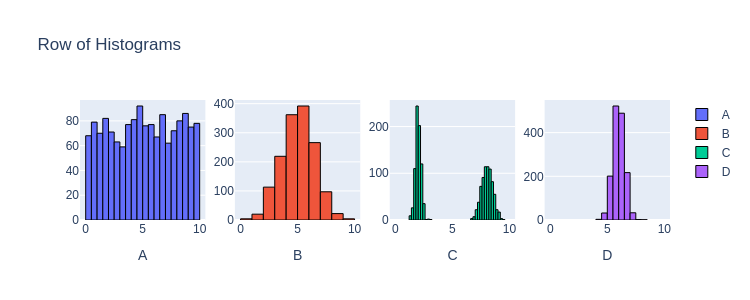

In [2]:
# Task 4

from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS



# 1. B and D
# 2. B and C
# 3. C and D
# 4. A and C

In [ ]:
# Task 5

# The mean and median are both measures of central tendency in statitstics. In a symmetric distribution they are usually close to each other. In a skewed distribution the mean is typically pulled in the direction of the skewness while the median remains mainly in the center. So in a right skewed graph the mean would be larger than the median. While in a left skewed graph the mean would be smaller than the median.
# In a symetric distribution, both sides are mirror images, and so the grpah has no skewness. 
# In a right skewed distribution the tail of the graph extends to the right. Right skewness occurs when a distribution has more low or moderate values but a few very high outliers (e.g., income distributions where a few people earn significantly more than the rest).
# In a left skewed distribution the tail of the graph extends to the left. Left skewness happens when there are a larger number of high values with a few low outliers (e.g., age at retirement, where most people retire around a certain age but a few retire much younger).


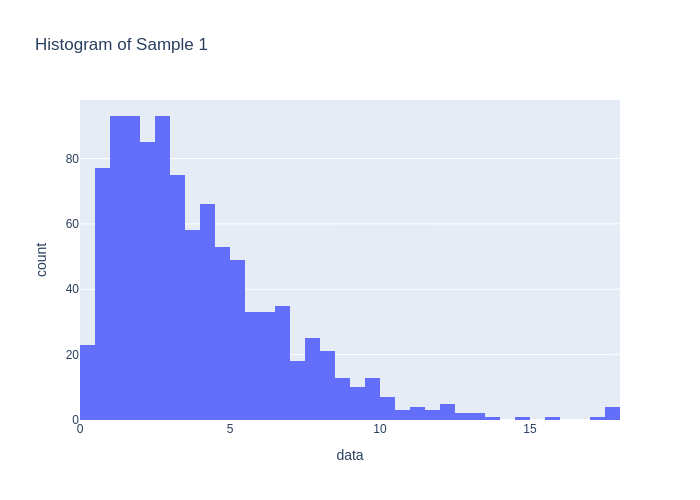

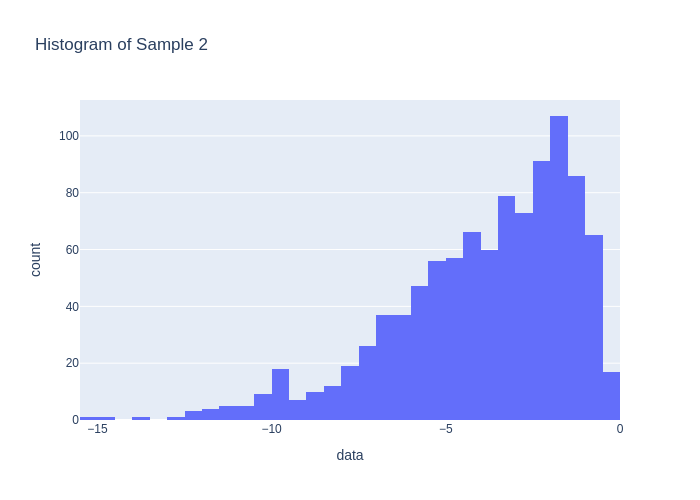

Sample 1 - Mean: 3.9344994031945184, Median: [3.25270592]
Sample 2 - Mean: -3.935145671749554, Median: [-3.34562134]


In [4]:
# Task 5 continuation

from scipy import stats
import pandas as pd
import numpy as np
import plotly.express as px  # Import plotly.express

# Generate a sample from a gamma distribution
sample1 = stats.gamma(a=2, scale=2).rvs(size=1000)

# Create a histogram for sample1
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data", title="Histogram of Sample 1")
fig1.show(renderer="png")  # Use this line to display the histogram

# Calculate the mean and median
mean1 = sample1.mean()
median1 = np.quantile(sample1, [0.5])  # median of sample1

# Generate a second sample that is the negative of another gamma distribution
sample2 = -stats.gamma(a=2, scale=2).rvs(size=1000)

# Create a histogram for sample2
fig2 = px.histogram(pd.DataFrame({'data': sample2}), x="data", title="Histogram of Sample 2")
fig2.show(renderer="png")  # Use this line to display the histogram

# Calculate the mean and median for sample2
mean2 = sample2.mean()
median2 = np.quantile(sample2, [0.5])  # median of sample2

# Print means and medians for both samples
print(f"Sample 1 - Mean: {mean1}, Median: {median1}")
print(f"Sample 2 - Mean: {mean2}, Median: {median2}")

# As you can see Sample 1 data creates a right skewed histogram as the tail extends to the right due to some outliers. We can confirm this because the mean is larger than the median which I have previously stated is a factor of right skewed graphs. 
# The inverse of sample 1: Sample 2 on the other hand creates a left skewed histogram as the tail extends to the left due to some outliers. We can confirm this because the mean is smaller than the median which I have previously stated is a factor of left skewed graphs

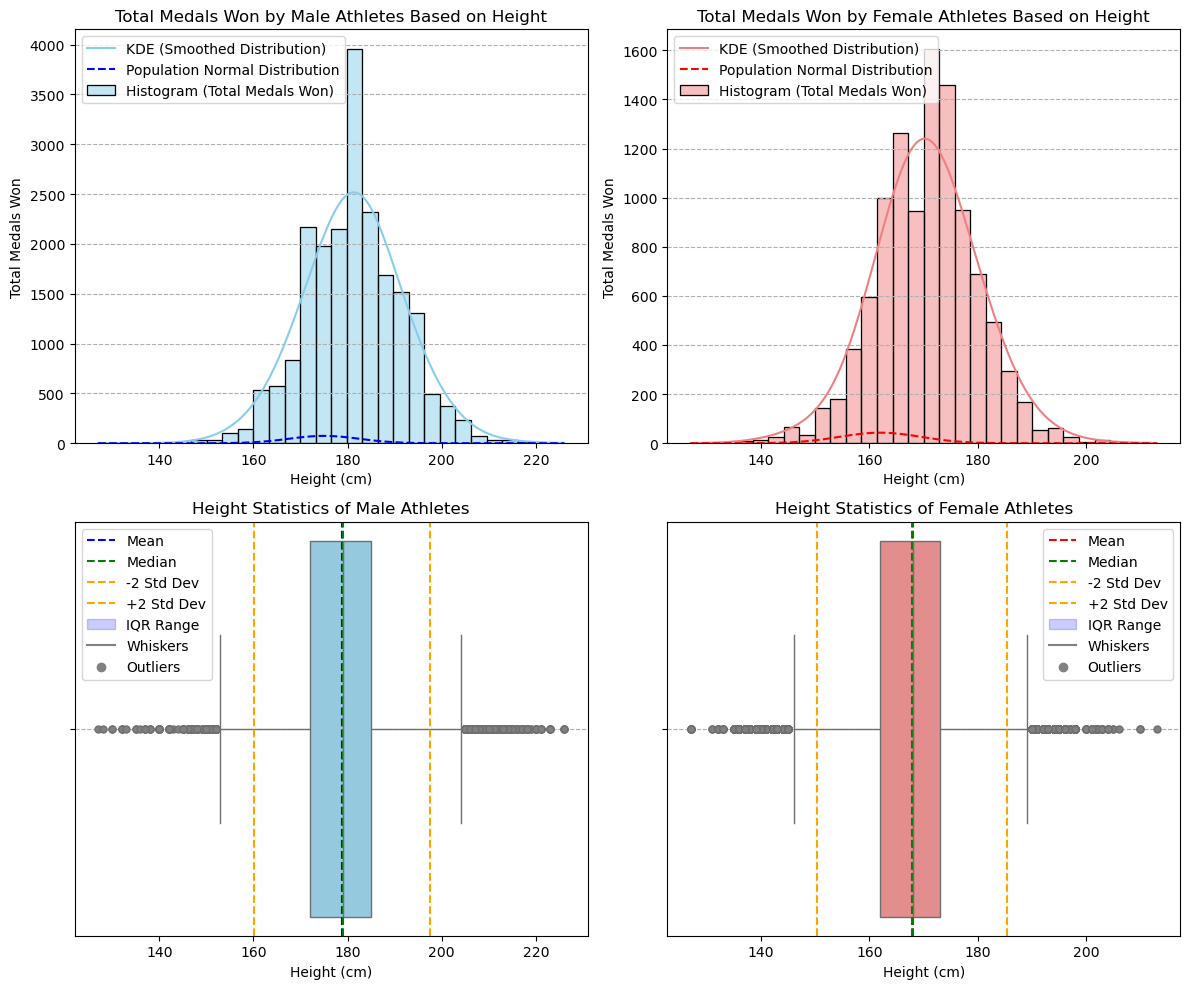

In [7]:
# Task 6

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Load the Olympics dataset from the GitHub URL
olympics_url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-08-06/olympics.csv'
olympics_df = pd.read_csv(olympics_url)

# Filter for male athletes
male_athletes_df = olympics_df[olympics_df['sex'] == 'M']
# Group by height and count the number of medals for male athletes
medals_by_height_male = male_athletes_df.groupby('height')['medal'].count().reset_index()

# Filter for female athletes
female_athletes_df = olympics_df[olympics_df['sex'] == 'F']
# Group by height and count the number of medals for female athletes
medals_by_height_female = female_athletes_df.groupby('height')['medal'].count().reset_index()

# Population average heights and standard deviations
avg_population_height_male = 175  # in cm
std_population_height_male = 7.5   # an example standard deviation
avg_population_height_female = 162  # in cm
std_population_height_female = 7.5   # an example standard deviation

# Calculate statistics for male athletes
mean_height_male = male_athletes_df['height'].mean()
median_height_male = male_athletes_df['height'].median()
iqr_height_male = stats.iqr(male_athletes_df['height'])
range_height_male = male_athletes_df['height'].max() - male_athletes_df['height'].min()
std_dev_height_male = male_athletes_df['height'].std()

# Calculate statistics for female athletes
mean_height_female = female_athletes_df['height'].mean()
median_height_female = female_athletes_df['height'].median()
iqr_height_female = stats.iqr(female_athletes_df['height'])
range_height_female = female_athletes_df['height'].max() - female_athletes_df['height'].min()
std_dev_height_female = female_athletes_df['height'].std()

# Create the bar plots and KDE plots
plt.figure(figsize=(12, 10))

# Bar plot and KDE for male athletes
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, first subplot
sns.histplot(medals_by_height_male, x='height', weights='medal', bins=30, color='skyblue', kde=True)
# Normal distribution curve for population
x = np.linspace(medals_by_height_male['height'].min(), medals_by_height_male['height'].max(), 100)
p = stats.norm.pdf(x, avg_population_height_male, std_population_height_male)
plt.plot(x, p * max(medals_by_height_male['medal']), color='blue', linestyle='--', label='Population Normal Distribution')
plt.xlabel('Height (cm)')
plt.ylabel('Total Medals Won')
plt.title('Total Medals Won by Male Athletes Based on Height')
plt.legend(['KDE (Smoothed Distribution)', 'Population Normal Distribution', 'Histogram (Total Medals Won)'])
plt.grid(axis='y', linestyle='--')

# Bar plot and KDE for female athletes
plt.subplot(2, 2, 2)  # 2 rows, 2 columns, second subplot
sns.histplot(medals_by_height_female, x='height', weights='medal', bins=30, color='lightcoral', kde=True)
# Normal distribution curve for population
x = np.linspace(medals_by_height_female['height'].min(), medals_by_height_female['height'].max(), 100)
p = stats.norm.pdf(x, avg_population_height_female, std_population_height_female)
plt.plot(x, p * max(medals_by_height_female['medal']), color='red', linestyle='--', label='Population Normal Distribution')
plt.xlabel('Height (cm)')
plt.ylabel('Total Medals Won')
plt.title('Total Medals Won by Female Athletes Based on Height')
plt.legend(['KDE (Smoothed Distribution)', 'Population Normal Distribution', 'Histogram (Total Medals Won)'])
plt.grid(axis='y', linestyle='--')

# Box plot for male athletes' height statistics
plt.subplot(2, 2, 3)  # 2 rows, 2 columns, third subplot
sns.boxplot(x=male_athletes_df['height'], color='skyblue', flierprops=dict(markerfacecolor='grey', marker='o', markersize=5, linestyle='none'))
plt.axvline(mean_height_male, color='blue', linestyle='--', label='Mean')  # Mean height line
plt.axvline(median_height_male, color='green', linestyle='--', label='Median')  # Median height line
plt.axvline(mean_height_male - 2*std_dev_height_male, color='orange', linestyle='--', label='-2 Std Dev')  # -2 Std Dev line
plt.axvline(mean_height_male + 2*std_dev_height_male, color='orange', linestyle='--', label='+2 Std Dev')  # +2 Std Dev line

# Add a shaded blue box for the IQR range
plt.fill_betweenx(y=[0, 1], x1=median_height_male - (iqr_height_male / 2), x2=median_height_male + (iqr_height_male / 2), color='blue', alpha=0.2, label='IQR Range')

# Adding whiskers to the legend
plt.plot([], [], color='grey', linestyle='-', linewidth=1.5, label='Whiskers')
plt.scatter([], [], color='grey', marker='o', label='Outliers')

plt.title('Height Statistics of Male Athletes')
plt.xlabel('Height (cm)')
plt.legend()

plt.grid(axis='y', linestyle='--')

# Box plot for female athletes' height statistics
plt.subplot(2, 2, 4)  # 2 rows, 2 columns, fourth subplot
sns.boxplot(x=female_athletes_df['height'], color='lightcoral', flierprops=dict(markerfacecolor='grey', marker='o', markersize=5, linestyle='none'))
plt.axvline(mean_height_female, color='red', linestyle='--', label='Mean')  # Mean height line
plt.axvline(median_height_female, color='green', linestyle='--', label='Median')  # Median height line
plt.axvline(mean_height_female - 2*std_dev_height_female, color='orange', linestyle='--', label='-2 Std Dev')  # -2 Std Dev line
plt.axvline(mean_height_female + 2*std_dev_height_female, color='orange', linestyle='--', label='+2 Std Dev')  # +2 Std Dev line

# Add a shaded blue box for the IQR range
plt.fill_betweenx(y=[0, 1], x1=median_height_female - (iqr_height_female / 2), x2=median_height_female + (iqr_height_female / 2), color='blue', alpha=0.2, label='IQR Range')

# Adding whiskers to the legend
plt.plot([], [], color='grey', linestyle='-', linewidth=1.5, label='Whiskers')
plt.scatter([], [], color='grey', marker='o', label='Outliers')

plt.title('Height Statistics of Female Athletes')
plt.xlabel('Height (cm)')
plt.legend()

plt.grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show(renderer="png")

# The first 2 graphs are used to see the distribution of medals won compared to height. With this we can see what heights are best for winning medals in the olympics for both men and women. I have added a kde to each graph to help better visualize distribution that would better represent population. With that said I have also added a normal distribution which accounts for the population of the world. This could be interesting as it shows that olympians that have won the most medals are on average taller than the average human. 
# The 2 graphs below show a larger insight on the statistics of these olympians. It shows the mean and median heights. As well as IQR range, 2 standard deviations. And another interesting aspect: whiskers which represent the highest data point within 1.5 times the IQR from Q3 and the lowest data point within 1.5 times the IQR from Q1. Additionally any data points beyond the whiskers are considered outliers and are represented as individual grey circles
